In [1]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import os
import numpy as np
from tensorflow.keras import layers
from IPython.display import Audio
import wave
import pandas as pd
import tensorflow as tf
import cv2
import matplotlib.pyplot as plt

2024-03-02 11:55:57.143456: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-02 11:55:57.143499: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-02 11:55:57.145165: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-02 11:55:57.153973: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-02 11:55:58.249372: W tensorflow/compiler/tf2

In [2]:
df = pd.read_csv("../data_processing/sep28k-mfcc.csv")

In [3]:
df = df[df['NaturalPause'] == 0]
df = df[df['Interjection'] == 0]
df = df[df['WordRep'] == 0]
df = df[df['SoundRep'] == 0]
df = df[df['Block'] == 0]
df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,29,30,31,32,33,34,35,36,37,38
2,HeStutters,0,2,34809760,34857760,0,0,0,0,0,...,-3.249218,-3.218731,0.360520,-0.115838,1.723229,-1.460772,-1.430723,-1.429669,-0.178196,-3.046811
3,HeStutters,0,3,35200640,35248640,0,0,1,0,0,...,-2.084866,0.856960,-0.589489,-0.935007,0.202947,-2.603561,-1.701218,-2.591237,0.655423,0.828504
4,HeStutters,0,4,35721920,35769920,0,0,0,0,0,...,-2.057481,-3.225782,-1.561315,-3.723942,-2.249673,-3.513439,-2.097951,-1.940040,0.020210,-0.556461
5,HeStutters,0,5,36435040,36483040,0,0,1,0,0,...,-2.220595,-4.731575,-4.027788,-4.388147,-3.380947,-5.370929,-2.888416,-4.782809,-4.708760,-6.034374
6,HeStutters,0,6,37251200,37299200,0,0,0,0,0,...,-4.985494,-6.181957,-2.396787,-6.544606,-2.319257,-3.688410,-0.221778,-1.690031,0.664374,-0.303436


In [4]:
df = df.reset_index()
df.head()

,index,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,...,29,30,31,32,33,34,35,36,37,38
0,2,HeStutters,0,2,34809760,34857760,0,0,0,0,...,-3.249218,-3.218731,0.360520,-0.115838,1.723229,-1.460772,-1.430723,-1.429669,-0.178196,-3.046811
1,3,HeStutters,0,3,35200640,35248640,0,0,1,0,...,-2.084866,0.856960,-0.589489,-0.935007,0.202947,-2.603561,-1.701218,-2.591237,0.655423,0.828504
2,4,HeStutters,0,4,35721920,35769920,0,0,0,0,...,-2.057481,-3.225782,-1.561315,-3.723942,-2.249673,-3.513439,-2.097951,-1.940040,0.020210,-0.556461
3,5,HeStutters,0,5,36435040,36483040,0,0,1,0,...,-2.220595,-4.731575,-4.027788,-4.388147,-3.380947,-5.370929,-2.888416,-4.782809,-4.708760,-6.034374
4,6,HeStutters,0,6,37251200,37299200,0,0,0,0,...,-4.985494,-6.181957,-2.396787,-6.544606,-2.319257,-3.688410,-0.221778,-1.690031,0.664374,-0.303436


In [5]:
df = df.drop(columns=['index'])
df.head()

,Show,EpId,ClipId,Start,Stop,Unsure,PoorAudioQuality,Prolongation,Block,SoundRep,...,29,30,31,32,33,34,35,36,37,38
0,HeStutters,0,2,34809760,34857760,0,0,0,0,0,...,-3.249218,-3.218731,0.360520,-0.115838,1.723229,-1.460772,-1.430723,-1.429669,-0.178196,-3.046811
1,HeStutters,0,3,35200640,35248640,0,0,1,0,0,...,-2.084866,0.856960,-0.589489,-0.935007,0.202947,-2.603561,-1.701218,-2.591237,0.655423,0.828504
2,HeStutters,0,4,35721920,35769920,0,0,0,0,0,...,-2.057481,-3.225782,-1.561315,-3.723942,-2.249673,-3.513439,-2.097951,-1.940040,0.020210,-0.556461
3,HeStutters,0,5,36435040,36483040,0,0,1,0,0,...,-2.220595,-4.731575,-4.027788,-4.388147,-3.380947,-5.370929,-2.888416,-4.782809,-4.708760,-6.034374
4,HeStutters,0,6,37251200,37299200,0,0,0,0,0,...,-4.985494,-6.181957,-2.396787,-6.544606,-2.319257,-3.688410,-0.221778,-1.690031,0.664374,-0.303436


In [6]:
df.to_csv("prolongation.csv",index=False)

In [7]:
import os

def list_files(directory):
    return [f for f in os.listdir(directory) if os.path.isfile(os.path.join(directory, f))]

# Replace 'directory_path' with the path to your directory
directory_path = '/home/alien/Git/DATA/mel_spects_prolongation'
# names_list = list_files(directory_path)
names_list = pd.read_csv("prolongation.csv")['Name'].values.tolist()
# full_names_list = ["/home/alien/Git/DATA/mfcc_images/" + img + ".jpg" for img in names_list]
full_names_list = []
for img in names_list:
    corresponding_sound = df.loc[df['Name'] == img, 'Prolongation'].values[0]
    if corresponding_sound == 0:
        full_names_list.append("/home/alien/Git/DATA/mel_spects_prolongation/" + img + "_fluent.jpg")
    if corresponding_sound >= 1:
        full_names_list.append("/home/alien/Git/DATA/mel_spects_prolongation/" + img + "_stutter.jpg")

print(full_names_list[-2])

/home/alien/Git/DATA/mel_spects_prolongation/WomenWhoStutter_109_33_fluent.jpg


In [8]:
def load_all(imagefile_list):
    data = []
    labels = []

    for imagefile in imagefile_list:
        print(imagefile)
        image = cv2.imread(imagefile)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        image = cv2.resize(image, (224, 224))
        data.append(image)

        if "fluent" in imagefile:
            labels.append(0)
        else:
            labels.append(1)

    labels = np.array(labels)
    data = np.array(data)

    return data, labels

In [9]:
X, y = load_all(full_names_list)

/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_2_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_3_stutter.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_4_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_5_stutter.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_6_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_9_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_11_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_12_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_15_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_16_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_19_stutter.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_20_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_22_fluent.jpg
/home/alien/Git/DATA/mel_spects_prolongation/HeStutters_0_24_fluent

In [10]:
print(X[0])
print(y[0])

[[[229  87  91]
  [203  68  83]
  [206  69  98]
  ...
  [ 10   0  30]
  [  5   2  22]
  [  1   5   7]]

 [[252 137 103]
  [249 134 108]
  [251 125 117]
  ...
  [ 45  22  80]
  [ 37  24  65]
  [  2   4  12]]

 [[241 144  84]
  [243 145  92]
  [245 131  93]
  ...
  [ 44  13  96]
  [ 40  21  79]
  [  5   1  19]]

 ...

 [[206  65 117]
  [201  62 108]
  [204  61 118]
  ...
  [ 52  16 106]
  [ 55  21 103]
  [ 22   4  63]]

 [[ 86  28  44]
  [ 93  33  48]
  [ 93  30  51]
  ...
  [ 22   7  48]
  [ 24  10  49]
  [ 10   3  32]]

 [[  0   0   2]
  [  0   0   2]
  [  0   0   2]
  ...
  [  0   0   2]
  [  0   0   2]
  [  0   0   2]]]
0


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=12)

In [12]:
print("x_train shape:", X_train.shape)
print("x_test shape:", X_test.shape)
print('y_train shape:', y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (1752, 224, 224, 3)
x_test shape: (752, 224, 224, 3)
y_train shape: (1752,)
y_test shape: (752,)


In [13]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

1752 752 1752 752


In [14]:
from collections import Counter
print(Counter(y_train))
print(Counter(y_test))

Counter({0: 1184, 1: 568})
Counter({0: 514, 1: 238})


In [15]:
print(X_train)

[[[[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [ 89  20 109]
   [131  40 121]
   [134  37 144]]

  [[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [ 98  21 114]
   [132  39 122]
   [131  39 140]]

  [[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [112  23 122]
   [133  37 123]
   [126  40 136]]

  ...

  [[ 73  24 114]
   [ 19   3  54]
   [  9   7  39]
   ...
   [114  28 109]
   [168  54 126]
   [174  48 127]]

  [[ 33  12  52]
   [ 11   1  26]
   [  7   2  19]
   ...
   [ 52  16  50]
   [ 73  26  54]
   [ 75  24  53]]

  [[  0   0   2]
   [  0   0   2]
   [  0   0   2]
   ...
   [  0   0   2]
   [  0   0   2]
   [  0   0   2]]]


 [[[143  43 120]
   [145  39 125]
   [130  26 120]
   ...
   [ 18  11  49]
   [  9   5  27]
   [  1   1   0]]

  [[171  56 125]
   [181  61 134]
   [174  56 131]
   ...
   [ 31  20  74]
   [ 27  19  57]
   [  3   0   9]]

  [[185  52 112]
   [196  59 114]
   [194  58 107]
   ...
   [ 31  13  85]
   [ 31  18  73]
   [  1   0

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, MultiHeadAttention
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, AveragePooling2D, Attention, Reshape, TimeDistributed, Bidirectional, LSTM
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from sklearn.metrics import classification_report, confusion_matrix

In [17]:
vgg_model = tf.keras.models.load_model('./model_prolongation/')

2024-03-02 11:56:12.916695: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 11:56:12.939278: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-02 11:56:12.939645: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [18]:
vgg_model.summary

<bound method Model.summary of <keras.src.engine.functional.Functional object at 0x775c8ef1fe90>>

In [21]:
# Combine features
X_combined = np.concatenate((X_train, X_test), axis=0)

# Combine labels
y_combined = np.concatenate((y_train, y_test), axis=0)
# predictions
vgg_pred = vgg_model.predict(X_combined, batch_size=1)
np.set_printoptions(threshold=np.inf)
with open("temp.txt", "w") as file:
    # Write the variable's value to the file
    file.write(np.array2string(np.around(vgg_pred)))

vgg_pred = np.round(vgg_pred)

  # model evaluation
confusion = confusion_matrix(y_combined, vgg_pred)
print(classification_report(y_combined, vgg_pred))
print(confusion)

2504/2504 [==============================] - 8s 3ms/step
              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1698
           1       0.93      0.88      0.90       806

    accuracy                           0.94      2504
   macro avg       0.94      0.92      0.93      2504
weighted avg       0.94      0.94      0.94      2504

[[1641   57]
 [  96  710]]


: 

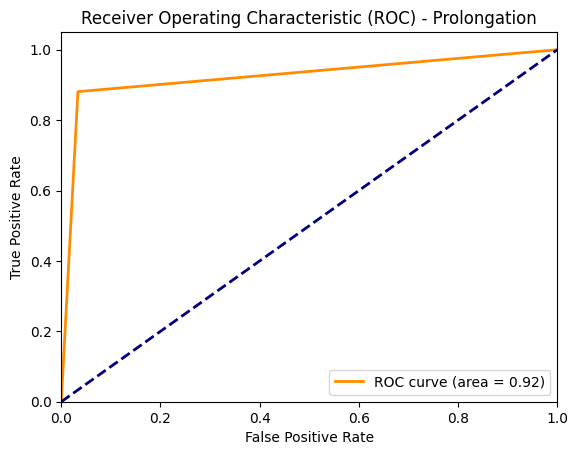

In [20]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming vgg_pred contains probabilities of belonging to class 1
fpr, tpr, thresholds = roc_curve(y_combined, vgg_pred)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Prolongation')
plt.legend(loc="lower right")
plt.show()